## Metamodelos: Superfícies de Resposta

### Funções de Base Radial (RBF)

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Funções de Base Radial (RBF)' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
nFunc = 34; Qvar = 12; countFunc=0
c = 1.e-2 # Fator de forma
Qtp = 8000 # Quantidade de pontos p/ treinamento

xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
xp = np.zeros((Qtp,Qvar) , dtype = 'float')
U = np.zeros(Qtp , dtype = 'float')

for i in range(0, Qvar):
    xmin[i] = -100; xmax[i] = 100

#Pontos de treinamento
for i in range(0,Qtp):
    for j in range(0,Qvar):
            r[j] = random.random()
            xp[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    U[i],countFunc = f(xp[i,:],nFunc,Qvar,countFunc)

In [4]:
psi =np.zeros((Qtp,Qtp) , dtype = 'float')
for i in range(0,Qtp):
    for j in range(0,Qtp):
        aux = 0
        for k in range(0,Qvar):
            aux = aux + ((xp[i,k]-xp[j,k])**2)
        psi[i,j] = np.sqrt(aux+c**2)
        
phi = np.linalg.solve(psi,U)

In [5]:
Qtp_aval = 1
x_aval = np.zeros((Qtp_aval,Qvar) , dtype = 'float')
U_aval = np.zeros(Qtp_aval , dtype = 'float')

for i in range(0,Qtp_aval):
    for j in range(0,Qvar):
        r[j] = random.random()
        x_aval[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])

for i in range(0,Qtp_aval):
    for j in range(0,Qtp):
        aux = 0
        for k in range(0,Qvar):
            aux = aux + ((x_aval[i,k]-xp[j,k])**2)
        U_aval[i] = U_aval[i]+(phi[j]*np.sqrt(aux+c**2))

In [6]:
def fobj(x_aval,xp,c,Qtp,Qvar,countFunc):
    U_aval = 0
    for j in range(0,Qtp):
        aux = 0
        for k in range(0,Qvar):
            aux = aux + ((x_aval[k]-xp[j,k])**2)
        U_aval = U_aval+(phi[j]*np.sqrt(aux+c**2))
        
    countFunc += 1
    return U_aval,countFunc

In [7]:
x_aval = [-36.63695, -45.10815, -50.94046, -55.60222, -59.68921, -62.61157, -65.67165, -68.35199, -70.41500, -73.35253, -75.02553, -76.76578]
U,countFunc = fobj(x_aval,xp,c,Qtp,Qvar,countFunc)
print(U)

1.2997967959675237e+25


__Enxame de Partícula__ 

In [8]:
name = 'Enxame de Partículas + RBF' 

In [9]:
Qtind = 20; kmax = 300; countFunc = 0

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
fHist = []
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')

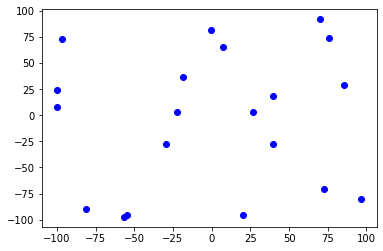

In [10]:
#criando a populacao inicial e suas funcoes objetivo
#o melhor individuo ja esta definido (pop == pi)

for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i],countFunc = fobj(pop[i,:],xp,c,Qtp,Qvar,countFunc)

plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

In [11]:
minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]
print(fbest)

-5.8042626154325475e+25


In [12]:
x=pop.copy()
layout = "{0:.5f}"
k=0
while k < kmax:
    k += 1
    for i in range(0, Qtind):
        for j in range(0, Qvar):
            r1[j] = random.random()
            r2[j] = random.random()
            x[i,j] = x[i,j] + 2.*r1[j]*(pop[i,j]-x[i,j]) + 2.*r2[j]*(pbest[j]-x[i,j])
            x[i,j] = max(min(x[i,j],xmax[j]),xmin[j])

        fsol[i],countFunc = fobj(x[i,:],xp,c,Qtp,Qvar,countFunc)
        
    for i in range(0, Qtind):
        if fsol[i] < fpop[i] :
            fpop[i]=fsol[i]
            pop[i,:]=x[i,:]
    
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    for i in range(0, Qvar):
        print(layout.format(pbest[i]), end =" ")
    print(layout.format(fbest))
    fHist.append(fbest)
    

-57.75134 -100.00000 -28.03420 -23.03054 90.02759 -33.29141 41.68817 100.00000 70.71576 -8.90575 -33.27011 -11.43953 -68565714253626494796431360.00000
-70.79168 -100.00000 -25.22604 -32.99323 85.16521 -22.43266 22.97224 84.56227 75.66581 -23.94890 -23.90522 -10.57301 -68767494413115407439233024.00000
-71.18672 -100.00000 -18.21786 -49.11140 77.53423 -24.17738 51.49656 92.20919 76.67198 -24.46704 -31.37576 -1.88510 -74966829403139856800940032.00000
-71.14168 -100.00000 -22.79255 -33.48799 72.71372 -22.92414 64.68635 92.48466 75.67058 -23.96917 -24.98841 -0.00165 -77034334023493121560543232.00000
-71.30918 -100.00000 -24.19303 -35.12149 69.91520 -24.09728 56.37157 93.17161 75.87553 -20.76108 -21.04247 2.47217 -78231521451107670994976768.00000
-71.23930 -100.00000 -24.45676 -34.41561 76.35928 -23.66328 48.94600 90.82638 76.51177 -18.88613 -23.45098 5.42993 -79218662705852847788916736.00000
-72.30657 -100.00000 -24.52052 -36.00710 72.40862 -27.82362 42.95789 90.32056 67.84544 -25.71265 -28

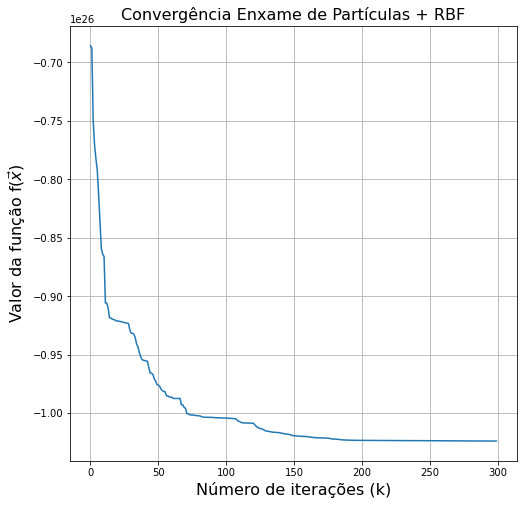

In [13]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [14]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  6020
Tempo de Execução = 1203.3389670848846 s
